<a href="https://colab.research.google.com/github/amd257/COVID-detection-using-CNNs/blob/improvements/Xception_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Compressed Dataset file is stored at: https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

!wget https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

--2021-02-21 22:20:05--  https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7avu1oypedrerxl/Dataset.zip [following]
--2021-02-21 22:20:05--  https://www.dropbox.com/s/raw/7avu1oypedrerxl/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef037cbec41c1ee8873e4c2447.dl.dropboxusercontent.com/cd/0/inline/BJZ740oG7JawdxHbYPAIg9X6eERixa8BCpIAoqSm3mmXVqEEzzLCRomVO9vF1dAxGboXA92pjFRoB_JkGNJVXfMSQI74z4PdY211o1GgRpBKz0eD2-V5wl9_iFWgz2cyNI4/file# [following]
--2021-02-21 22:20:06--  https://ucef037cbec41c1ee8873e4c2447.dl.dropboxusercontent.com/cd/0/inline/BJZ740oG7JawdxHbYPAIg9X6eERixa8BCpIAoqSm3mmXVqEEzzLCRomVO9vF1dAxGboXA92pjFRoB_JkGNJVXfMSQI74z4PdY211o1GgRpBKz

In [ ]:
!unzip /content/Dataset.zip?dl=0  #Extracting the compressed dataset

Archive:  /content/Dataset.zip?dl=0
   creating: Dataset/
   creating: Dataset/Test/
   creating: Dataset/Test/COVID/
  inflating: Dataset/Test/COVID/COVID (1001).png  
  inflating: Dataset/Test/COVID/COVID (1005).png  
  inflating: Dataset/Test/COVID/COVID (1012).png  
  inflating: Dataset/Test/COVID/COVID (1015).png  
  inflating: Dataset/Test/COVID/COVID (1019).png  
  inflating: Dataset/Test/COVID/COVID (1025).png  
  inflating: Dataset/Test/COVID/COVID (1027).png  
  inflating: Dataset/Test/COVID/COVID (1042).png  
  inflating: Dataset/Test/COVID/COVID (1043).png  
  inflating: Dataset/Test/COVID/COVID (1044).png  
  inflating: Dataset/Test/COVID/COVID (107).png  
  inflating: Dataset/Test/COVID/COVID (1073).png  
  inflating: Dataset/Test/COVID/COVID (1095).png  
  inflating: Dataset/Test/COVID/COVID (1099).png  
  inflating: Dataset/Test/COVID/COVID (113).png  
  inflating: Dataset/Test/COVID/COVID (1132).png  
  inflating: Dataset/Test/COVID/COVID (1143).png  
  inflating: Data

In [ ]:
train_images_path = "Dataset/Train"
validation_images_path = "Dataset/Validation"
test_images_path = "Dataset/Test"

In [ ]:
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Training data augmentation before feeding it to the CNN model
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )
#Training data apreprocessing before feeding it to the CNN model
train_generator= train_datagen.flow_from_directory(
    train_images_path,
    target_size = (256,256),
    batch_size = 60,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

train_generator.class_indices

Found 3108 images belonging to 3 classes.


{'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [ ]:
validation_dataset = image.ImageDataGenerator(rescale = 1./255)
   # shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    #)
#Validation data preprocessing before feeding it to the CNN model
validation_generator = validation_dataset.flow_from_directory(
    validation_images_path,
    target_size = (256,256),
    batch_size = 60,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

validation_generator.class_indices

Found 388 images belonging to 3 classes.


{'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

51
6


In [ ]:
model = keras.applications.Xception(weights=None, input_shape=(256, 256,3), classes=3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #changed the optimizer from rmsprop to adam
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
 hist = model.fit(train_generator, steps_per_epoch= STEP_SIZE_TRAIN, epochs=20, validation_data=validation_generator, validation_steps= STEP_SIZE_VALID)

Epoch 1/20
51/51 [==============================] - 103s 2s/step - loss: 0.7519 - accuracy: 0.7391 - val_loss: 1.1003 - val_accuracy: 0.3028
Epoch 2/20
51/51 [==============================] - 98s 2s/step - loss: 0.2719 - accuracy: 0.9051 - val_loss: 1.1091 - val_accuracy: 0.3000
Epoch 3/20
51/51 [==============================] - 98s 2s/step - loss: 0.2558 - accuracy: 0.9070 - val_loss: 1.1217 - val_accuracy: 0.3139
Epoch 4/20
51/51 [==============================] - 98s 2s/step - loss: 0.1838 - accuracy: 0.9337 - val_loss: 1.1547 - val_accuracy: 0.3222
Epoch 5/20
51/51 [==============================] - 98s 2s/step - loss: 0.1647 - accuracy: 0.9377 - val_loss: 1.2054 - val_accuracy: 0.2972
Epoch 6/20
51/51 [==============================] - 98s 2s/step - loss: 0.1593 - accuracy: 0.9467 - val_loss: 1.4195 - val_accuracy: 0.3083
Epoch 7/20
51/51 [==============================] - 98s 2s/step - loss: 0.1728 - accuracy: 0.9356 - val_loss: 1.6071 - val_accuracy: 0.3111
Epoch 8/20
51/51 [=

In [ ]:
model.save('Xception_v2.h5')

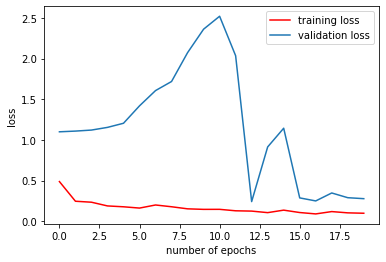

In [ ]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

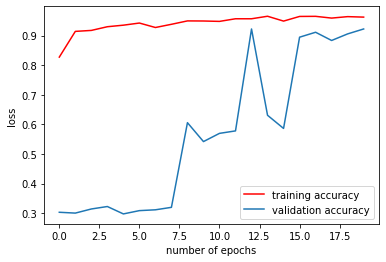

In [ ]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()